In [1]:
"""This snippet demonstrates how to model a PMCC (Poor Man's Covered Call) using bsm_time_machine."""
import warnings
warnings.filterwarnings('ignore')  # ignore numpy divide by zero

import pandas as pd

from bsm_time_machine import Underlying, Position, Call, Put

In [2]:
df = pd.read_pickle("../dfs/1day_spx_max_iv_rth.pkl")

rr mean: -2.51% | rr median: -3.58%


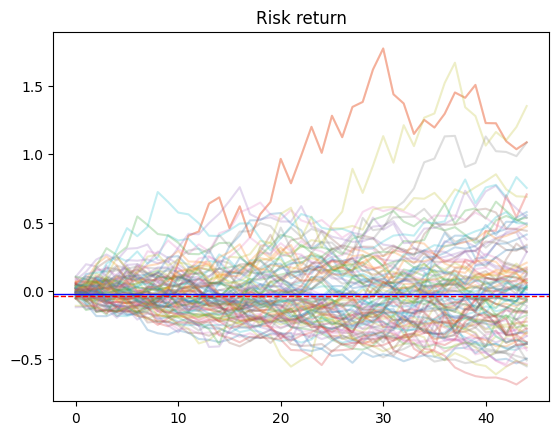

PoM mean: 1.56% | PoM median: 2.23%


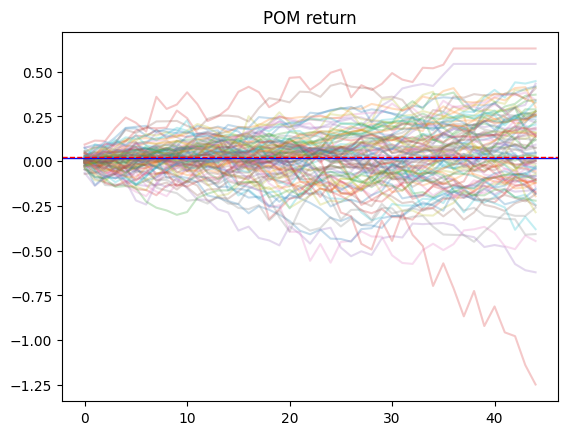

In [3]:
# * This example use case will show a simple PMCC (Poor Man's Covered Call).
# * Our long call will be deep in-the-money LEAPS
#   and will have a far-out maturity (> 1 year)
# * The relative strike of our long call, `0.34 X`, is
#   a constant multiplier of our strike and is the first
#   of two relative strike schemes supported.
#   roughly equal to 1360 strike when the spot is 4000
# long_call = Call("1 X", 650, 1)

u = Underlying(
    symbol="SPX",
    spread_loss=0.1,
    min_strike_gap=1,
)

# * Our short call will be out-of-the-money and nearer-term.
# * Here, we've gone with 45 DTE and `0.2 SD` relative strike.
# * This represents the second type of relative strike scheme
#   supported, volatility-based.
# * Here, we're selling a call that is 0.2 standard deviations
#   out-of-the-money.
# * our long call is faily deep in-the-money with a strike price of 0.34 * spot at position open
short_call = Call("0.3 SD", 45, 1)
long_call = Call("0.34 x", 600, 1)


p = Position(
    df,
    underlying=u,
    legs=[short_call, long_call],  # simply wrap each leg in a list
    holding_period=50,
    stop_loss=(-0.80),
    scalping=True,
    sequential_positions=True,
    pom_threshold=0.63,
    num_simulations=100,
    lrr_only=False,
    vol_threshold=2.0,
    lookback=3,
    vol_greater_than=True,
    iv_min_threshold=0.17,
    iv_max_threshold=0.23,
    iv_greater_than=False,
    iv_less_than=True
)

p.run()  # this runs the backtest
p.plot()

In [4]:
p.analyze_results()

subject


TypeError: expected non-empty vector for x